Santiago Caicedo Rojas y Jeremias Villalobos

## Librerías

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/gdrive')
data = pd.read_csv('gdrive/My Drive/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

Mounted at /content/gdrive


In [ ]:
data.head(n = 5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Análisis de los datos

In [ ]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
categorical_data = []
numerical_data = []
columns = []

for col in data:
  columns.append(col)

for i in range(len(data.dtypes)):
  if data.dtypes[i] == 'object' and columns[i] != 'Response':
    categorical_data.append(columns[i])
  if data.dtypes[i] == 'int64' or data.dtypes[i] == 'float64':
    numerical_data.append(columns[i])

print(categorical_data)
print(numerical_data)

['Customer', 'State', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [ ]:
data.shape

(9134, 24)

In [ ]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

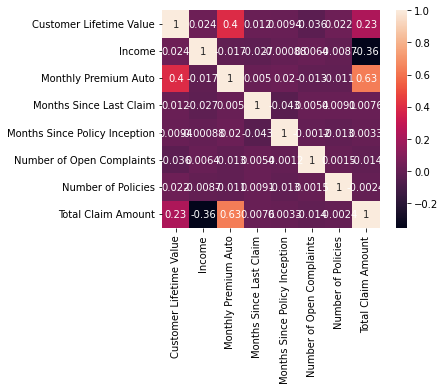

In [ ]:
sns.heatmap(data.corr(), square=True, annot=True)

In [ ]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

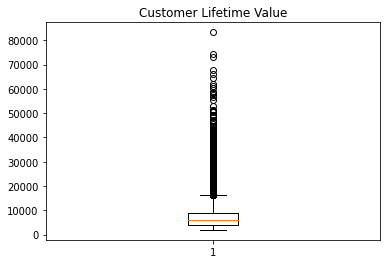

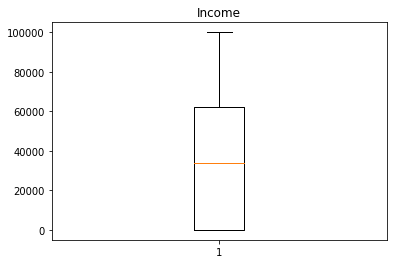

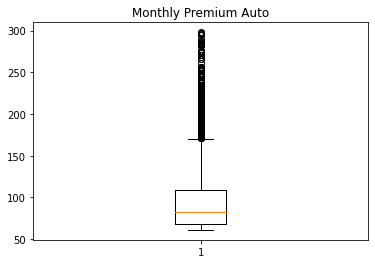

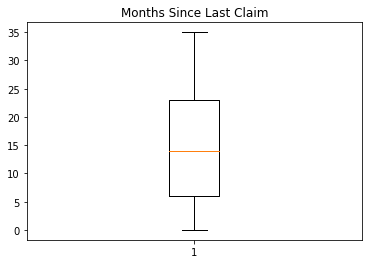

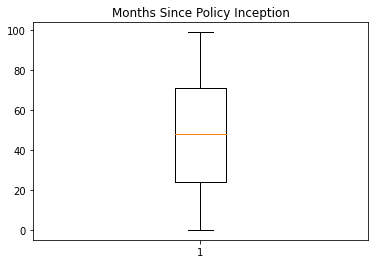

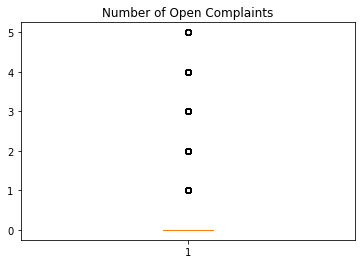

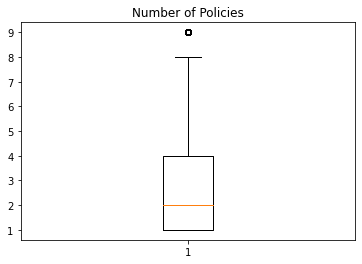

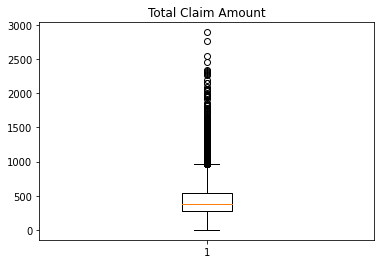

In [ ]:
#Diagrama de cajas y bigotes para atributos numéricos
for i in range(len(numerical_data)):
  col = numerical_data[i]
  plt.title(col)
  plt.boxplot(data[col])
  plt.show()

In [ ]:
df1 = data[numerical_data]
print(df1.shape)
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1
outliers_count = ((df1 < (q1 - 1.5 * iqr)) | (df1 > (q3 + 1.5 * iqr))).sum()
outliers_count

(9134, 8)


Customer Lifetime Value           817
Income                              0
Monthly Premium Auto              430
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints        1882
Number of Policies                416
Total Claim Amount                453
dtype: int64

In [ ]:
numeric_outliers_percentages = {attr : [(outliers_count[attr] / data.shape[0]) * 100] for attr in outliers_count.index}
numeric_outliers_percentages = pd.DataFrame(data = numeric_outliers_percentages)
numeric_outliers_percentages

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,8.944603,0.0,4.707686,0.0,0.0,20.604335,4.554412,4.959492


In [ ]:
print(data['Response'].value_counts())

No     7826
Yes    1308
Name: Response, dtype: int64


In [ ]:
for cat in categorical_data:
  print(cat, len(data[cat].unique()))

Customer 9134
State 5
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Location Code 3
Marital Status 3
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Vehicle Class 6
Vehicle Size 3


## 1 - Plan de ajuste de datos

Con respecto a la correlación de los atributos numéricos, los atributos presentan, en general, correlación baja, pero, monthly premium auto con total claim amount presentan correlación de 0.63 y monthly premium auto con customer lifetime value presentan correlacuón de 0.4. En caso de ser necesario, podriamos eliminar alguna de estas columnas.

Como podemos observar en los diagramas de cajas y bigotes y en el porcentaje de los datos atípicos por cada columna numerica, number of open complaints tiene un porcentaje alto de datos atípicos. Además, las columnas monthly premium auto, customer lifetime value, number of policies y total claim amount tienen datos atípicos con porcentaje bajo.

Reeemplazamos estos datos atípicos de cada columna por la mediana.

La base de datos está desbalanceada a favor de la etiqueta 'No' por lo que, procedemos a balancear los datos con undersampling para que la clase de respuesta tengan igual peso.

Por otro lado, en los datos categoricos, Customer representar un id de cada cliente y eso es irrelevante para el entrenamiento por lo que procedemos a eliminar esta columna y Effective to date representa fechas por lo cual, es irrelevante.

## 2 - Preprocesamiento

In [ ]:
data = data.drop(['Customer', 'Effective To Date'], axis = 1)
data.head(n = 5)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
categorical_data = []
numerical_data = []
columns = []

for col in data:
  columns.append(col)

for i in range(len(data.dtypes)):
  if data.dtypes[i] == 'object' and columns[i] != 'Response':
    categorical_data.append(columns[i])
  if data.dtypes[i] == 'int64' or data.dtypes[i] == 'float64':
    numerical_data.append(columns[i])

print(categorical_data)
print(numerical_data)

['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [ ]:
# Función para obetner los datos atípicos
def get_outliers(attr):
  outliers = ((data[[attr]] < (q1 - 1.5 * iqr)) | (data[[attr]] > (q3 + 1.5 * iqr)))[attr]
  return outliers

In [ ]:
noc_median = data['Number of Open Complaints'].median()
clv_median = data['Customer Lifetime Value'].median()

In [ ]:
noc_outliers = get_outliers('Number of Open Complaints')
clv_outliers = get_outliers('Customer Lifetime Value')

for index, value in noc_outliers.iteritems():
    if value:
        data.loc[index, 'Number of Open Complaints'] = noc_median

for index, value in clv_outliers.iteritems():
    if value:
        data.loc[index, 'Customer Lifetime Value'] = clv_median

<ipython-input-17-059b5ac62c07>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data[[attr]] < (q1 - 1.5 * iqr)) | (data[[attr]] > (q3 + 1.5 * iqr)))[attr]


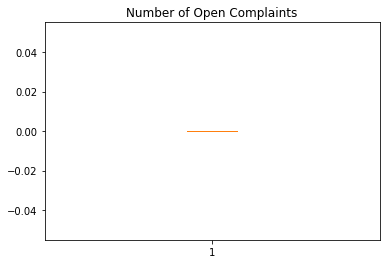

In [ ]:
col = 'Number of Open Complaints'
plt.title(col)
plt.boxplot(data[col])
plt.show()

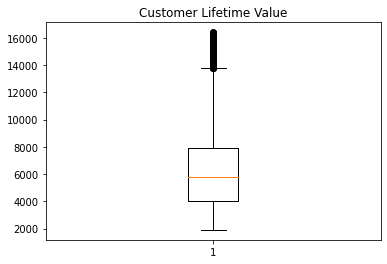

In [ ]:
col = 'Customer Lifetime Value'
plt.title(col)
plt.boxplot(data[col])
plt.show()

In [ ]:
def encode_data(data, categorical_data):
    encoded_data = pd.get_dummies(data, columns = categorical_data)
    cat_columns = encoded_data.select_dtypes(['object']).columns
    encoded_data[cat_columns] = encoded_data[cat_columns].apply(lambda x: pd.factorize(x)[0])
    return encoded_data

In [ ]:
for cd in categorical_data:
    print('{} # {}'.format(cd, data[cd].nunique()), end=' | ')
print()

encoded_data = encode_data(data, categorical_data)
encoded_data.head(n = 5)

State # 5 | Coverage # 3 | Education # 5 | EmploymentStatus # 5 | Gender # 2 | Location Code # 3 | Marital Status # 3 | Policy Type # 3 | Policy # 9 | Renew Offer Type # 4 | Sales Channel # 4 | Vehicle Class # 6 | Vehicle Size # 3 | 


,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,0,56274,69,32,5,0,1,384.811147,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,0,94,13,42,0,8,1131.464935,1,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,0,48767,108,18,38,0,2,566.472247,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,0,106,18,65,0,7,529.881344,0,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,0,43836,73,12,44,0,1,138.130879,0,...,0,1,0,0,0,0,0,0,1,0


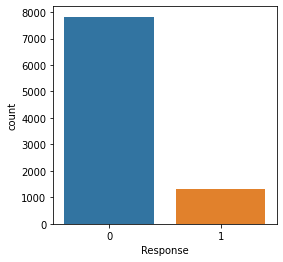

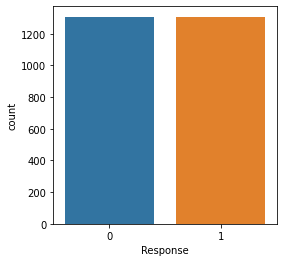

1    1308
0    1308
Name: Response, dtype: int64

In [ ]:
sample_size = (encoded_data.loc[encoded_data['Response'] == 1])['Response'].value_counts()[1]

balanced_data = (encoded_data.groupby('Response', as_index=False)
        .apply(lambda x: x.sample(n=sample_size))
        .reset_index(drop=True)).copy()

balanced_data = balanced_data.sample(frac=1)

plt.figure(figsize=(4, 4))
sns.countplot(x='Response', data=encoded_data)
plt.show()
plt.figure(figsize=(4, 4))
sns.countplot(x='Response', data=balanced_data)
plt.show()
balanced_data['Response'].value_counts()

## 3, 4 - Separación de datos y entrenamiento


Nos pide entrenar con Regresión lineal, sin embargo, ya que este modelo no es de clasificación sino de predicción de números reales, no tiene sentido aplicar este algoritmo en esta base de datos a diferencia de los otros 4 algoritmos que si son de clasificación.

In [ ]:
X = balanced_data.drop(['Response'], axis = 1).copy()
y = balanced_data['Response'].copy()
y

2469    1
667     0
187     0
238     0
1886    1
       ..
2182    1
850     0
1083    0
891     0
1232    0
Name: Response, Length: 2616, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data, scaler, columns):
    for col in columns:
        scaled_col = scaler.fit_transform(data[col].values.reshape(-1, 1))
        data[col] = scaled_col
    return data


scaler = StandardScaler() 
columns = numerical_data

normalize_data(X, scaler, columns)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
2469,-0.558971,-0.712631,-0.821285,-1.403299,-0.447432,0.0,0.050769,-0.468444,0,0,...,0,1,0,0,0,0,0,0,1,0
667,-1.234933,-0.443382,-0.934659,1.321889,-1.283570,0.0,-0.784529,0.002486,0,0,...,0,1,0,0,0,0,0,0,0,1
187,-0.367256,0.763282,-0.792942,-0.797702,-0.265663,0.0,2.556665,-0.534030,0,0,...,0,1,0,0,0,0,0,0,1,0
238,-1.116073,-1.311106,-0.056015,1.120023,-1.356277,0.0,-0.784529,0.809918,0,0,...,0,0,0,0,0,0,1,0,1,0
1886,-0.130522,-1.311106,0.227419,2.028419,-0.011187,0.0,-0.366880,0.189081,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,-0.822534,1.489963,-0.112702,-1.403299,0.752243,0.0,-0.784529,-0.024170,0,0,...,0,0,0,0,0,0,1,1,0,0
850,0.016647,-1.311106,-0.339448,1.120023,-1.319923,0.0,2.556665,-0.909902,0,0,...,0,0,0,0,0,0,1,1,0,0
1083,-0.060772,-0.332870,-0.452822,-0.898635,1.297550,0.0,0.050769,-1.342087,0,0,...,1,0,0,0,0,0,1,1,0,0
891,0.122461,-1.311106,-0.027672,-1.302366,1.442965,0.0,0.050769,-1.469475,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

lgm = LogisticRegression()
#lrm = LinearRegression()
knc = KNeighborsClassifier(n_neighbors = 5)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

model_list = [lgm, knc, lda, qda]

all_scores = {}
conf_m_vals = {}

for m in model_list:
  m = m.__class__.__name__
  all_scores[m] = {'f1': [],
                   'precision': [],
                   'recall': [],
                   }
  conf_m_vals[m] = np.array([[0, 0],[0, 0]])

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  X_train = normalize_data(X_train, scaler, columns)
  X_test = normalize_data(X_test, scaler, columns)
  for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_true = y_test, y_pred = y_pred)
    precision = precision_score(y_true = y_test, y_pred = y_pred)
    recall = recall_score(y_true = y_test, y_pred = y_pred)
    all_scores[model.__class__.__name__]['f1'].append(f1)
    all_scores[model.__class__.__name__]['precision'].append(precision)
    all_scores[model.__class__.__name__]['recall'].append(recall)
    cm = confusion_matrix(y_test, y_pred)
    conf_m_vals[model.__class__.__name__] += cm


/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

## 6 - Métricas de desempeño

In [ ]:
for score in all_scores:
  print(score)
  for metric in all_scores[score]:
    print('\t', metric, (sum(all_scores[score][metric])) / len(all_scores[score][metric]))
  print()


LogisticRegression
	 f1 0.7346905727046058
	 precision 0.7165449594319495
	 recall 0.7550353902356484

KNeighborsClassifier
	 f1 0.8193000112701425
	 precision 0.7168271105237511
	 recall 0.9565656890357213

LinearDiscriminantAnalysis
	 f1 0.7362987837673856
	 precision 0.7111098238426448
	 recall 0.7648098653540807

QuadraticDiscriminantAnalysis
	 f1 0.6398237040952215
	 precision 0.6061188413630452
	 recall 0.7013290749435594



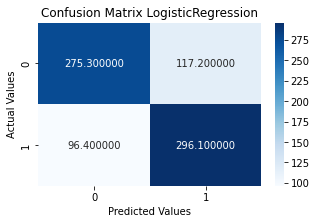

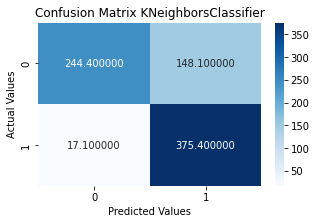

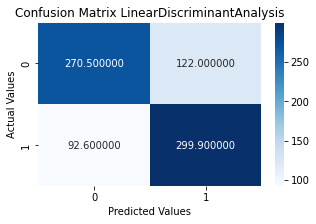

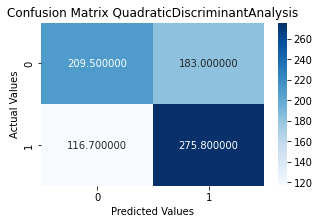

In [ ]:
from sklearn.metrics import confusion_matrix

for m in conf_m_vals:
  cm = conf_m_vals[m] / 10
  plt.figure(figsize=(5,3))
  plt.title('Confusion Matrix ' + m)
  sns.heatmap(cm, annot=True,fmt='f', cmap='Blues')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()


## 7- Análisis de los resultados

Según los resultados de los modelos entrenados, en general, se tiene un gran rendimiento con la métrica de f1_score en los 4 algoritmos usados. Siendo el mejor, el de k vecinos, luego LDA, luego regresión logística y por último, QDA. QDA da bajito porque porque se usa para clasificación multiclase a diferencia de los demás.

Además, la precision de los 4 algoritmos entrenados son buenos, pero, el de QDA sigue siendo el más bajo de todos.

En general, se obtuvo un gran desempeño y rendimiento usando cada algoritmo, sobre todo KNN.

Es claro que para clasificación binaria, los mejores algoritmos son regresión logistica, KNN y LDA. El de regresión lineal no tiene sentido en este tipo de problemas porque no es para clasificación sino para predicción de números reales. Además, QDA no tuvo tan buen rendimiento porque aunque es de clasificación, se emplea mejor para clasificación multiclase y no binaria.